In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [251]:
df = pd.read_csv("train_data_segged_third_one.csv")

In [252]:
df = df.rename(columns={"V1": "cat"})
df = df.rename(columns={"seg2": "seg"})

In [253]:
len(df)

30000

In [254]:
df.sample(10)

,cat,seg
8190,sports,追 魔獸 尼克 拒 明星 賽 正在 奧蘭多 舉行 奧蘭多 魔術隊 球星 霍華德 動態 備受矚...
11154,health,美男換 臉 滿意 擁抱 今天 詳細 說明 宣稱 世界 最 全面 臉部 移植 這項 手術 一名...
20345,tech,全球 使命 限量 壓測 Epic Games 首次 合作 線 動作 射擊 遊戲 全球 使命 ...
8681,tech,天外 Online 研發 資料 製 研發 遊戲 經典 續作 天外 Online 匯集 旗下 ...
24303,tech,調查 行動 購物 手機 購物 季 使用 手機 網站 購物 消費者 約 佔 45 51 使用 ...
18124,politics,拍 火車 底部 男 影 著錄 賭局
25446,travel,莒光 號 紀念 戳 攝影 南迴鐵路 台東 瀧溪 站 民國 81 年 通車 後 莒光 號 列車...
17675,edu,家 扶 表揚 優秀 暨 聯歡 運動會 活動 十六日 基隆市 婦幼 中心 七樓 第一 會議室 ...
2628,travel,花蓮 瑞穗 富興 社區 媽媽 手工 將內 餡 包入 麵 糰 此為 放入 模具 尚未 烘烤 鳳...
9071,sports,UBA 台 藝 臺 26 日 最後 一天 白天 兩戰 有人 從峰 頂 掉 谷底 有人 谷底 ...


In [255]:
print(df["cat"].isnull().sum())
print(df["seg"].isnull().sum())

0
0


In [256]:
tmp = {"cat": df['cat'].value_counts().index, "count": df["cat"].value_counts()}

In [257]:
ndf = pd.DataFrame(data = tmp).reset_index(drop=True)

In [258]:
ndf 

,cat,count
0,sports,5050
1,tech,5048
2,edu,4995
3,politics,4995
4,health,4969
5,travel,4943


In [259]:
df['cat_id'] = df['cat'].factorize()[0]
cat_id_df = df[['cat', 'cat_id']].drop_duplicates().sort_values('cat_id').reset_index(drop=True)
cat_to_id = dict(cat_id_df.values)
id_to_cat = dict(cat_id_df[['cat_id', 'cat']].values)

In [260]:
df.sample(10)

,cat,seg,cat_id
22028,sports,UBA 大專 籃球聯賽 文化 今天 幾場 比賽 成績,1
26306,politics,史 亞平 駐 星 章計平 今天 日 表示 目前 諮詢 星國 政府 意見 無法 對外 公開 前...,3
16425,politics,陳 已 通知 地方 曾 查獲 多起 含 瘦肉精 美國 牛肉 衛生署 昨天 透露 迄今 業者 ...,3
23250,health,腦神經 新 發現 疾病 奧秘 記者 徐兆玄 攝影 台大 醫學院 教授 曾文毅 哈佛 醫學院 ...,0
3487,health,膠囊 葷的 成為 牛 算 破戒 吃葷 英國 一項 研究 報導 指出 近一半 素食者 不知情 ...,0
1164,tech,料理 東西 軍 國家 月 日 日 兩 天將 料理 東西 軍 概念 搬上 國家 音樂廳 舞台 ...,5
9191,edu,媽媽 回頭 找 爸爸 吳 柏 軒 黃 豪 新 北 報導 新 北 市 新莊 區 思源 路 17...,4
1209,travel,台北 南港 山 溪流 小溪 漂亮 壺穴 景觀 早年 運送 茶 米 鞍部 步道 綠樹 竹林 夏...,2
28322,sports,生涯 首度 雙十 林書豪 今天 二度 先發 率領 紐約 尼克 隊 作客 迎戰 華盛頓 巫師 ...,1
26020,politics,龍應 台 掌 文建會 掌 公職 第一 文化部長 文建會 主委 龍應 台 上午 完成 交接 典...,3


cat
\n
-health, sports,  travel, politics,   edu,    tech

cat_id
 0. health, 1. sports, 2. travel, 3. politics,4. edu, 5. tech

In [160]:
from collections import Counter
from wordcloud import WordCloud

In [161]:
def generate_wordcloud(tup):
    wordcloud = WordCloud(background_color='white',
                          font_path='msjh.ttc',
                          max_words=50, max_font_size=40,
                          random_state=42
                         ).generate(str(tup))
    return wordcloud

In [162]:
cat_desc = dict()

In [163]:
for cat in cat_id_df.cat.values: 
    
    text = df.loc[df['cat']==cat, 'seg']
    text = (' '.join(map(str,text))).split(' ')
    cat_desc[cat]=text

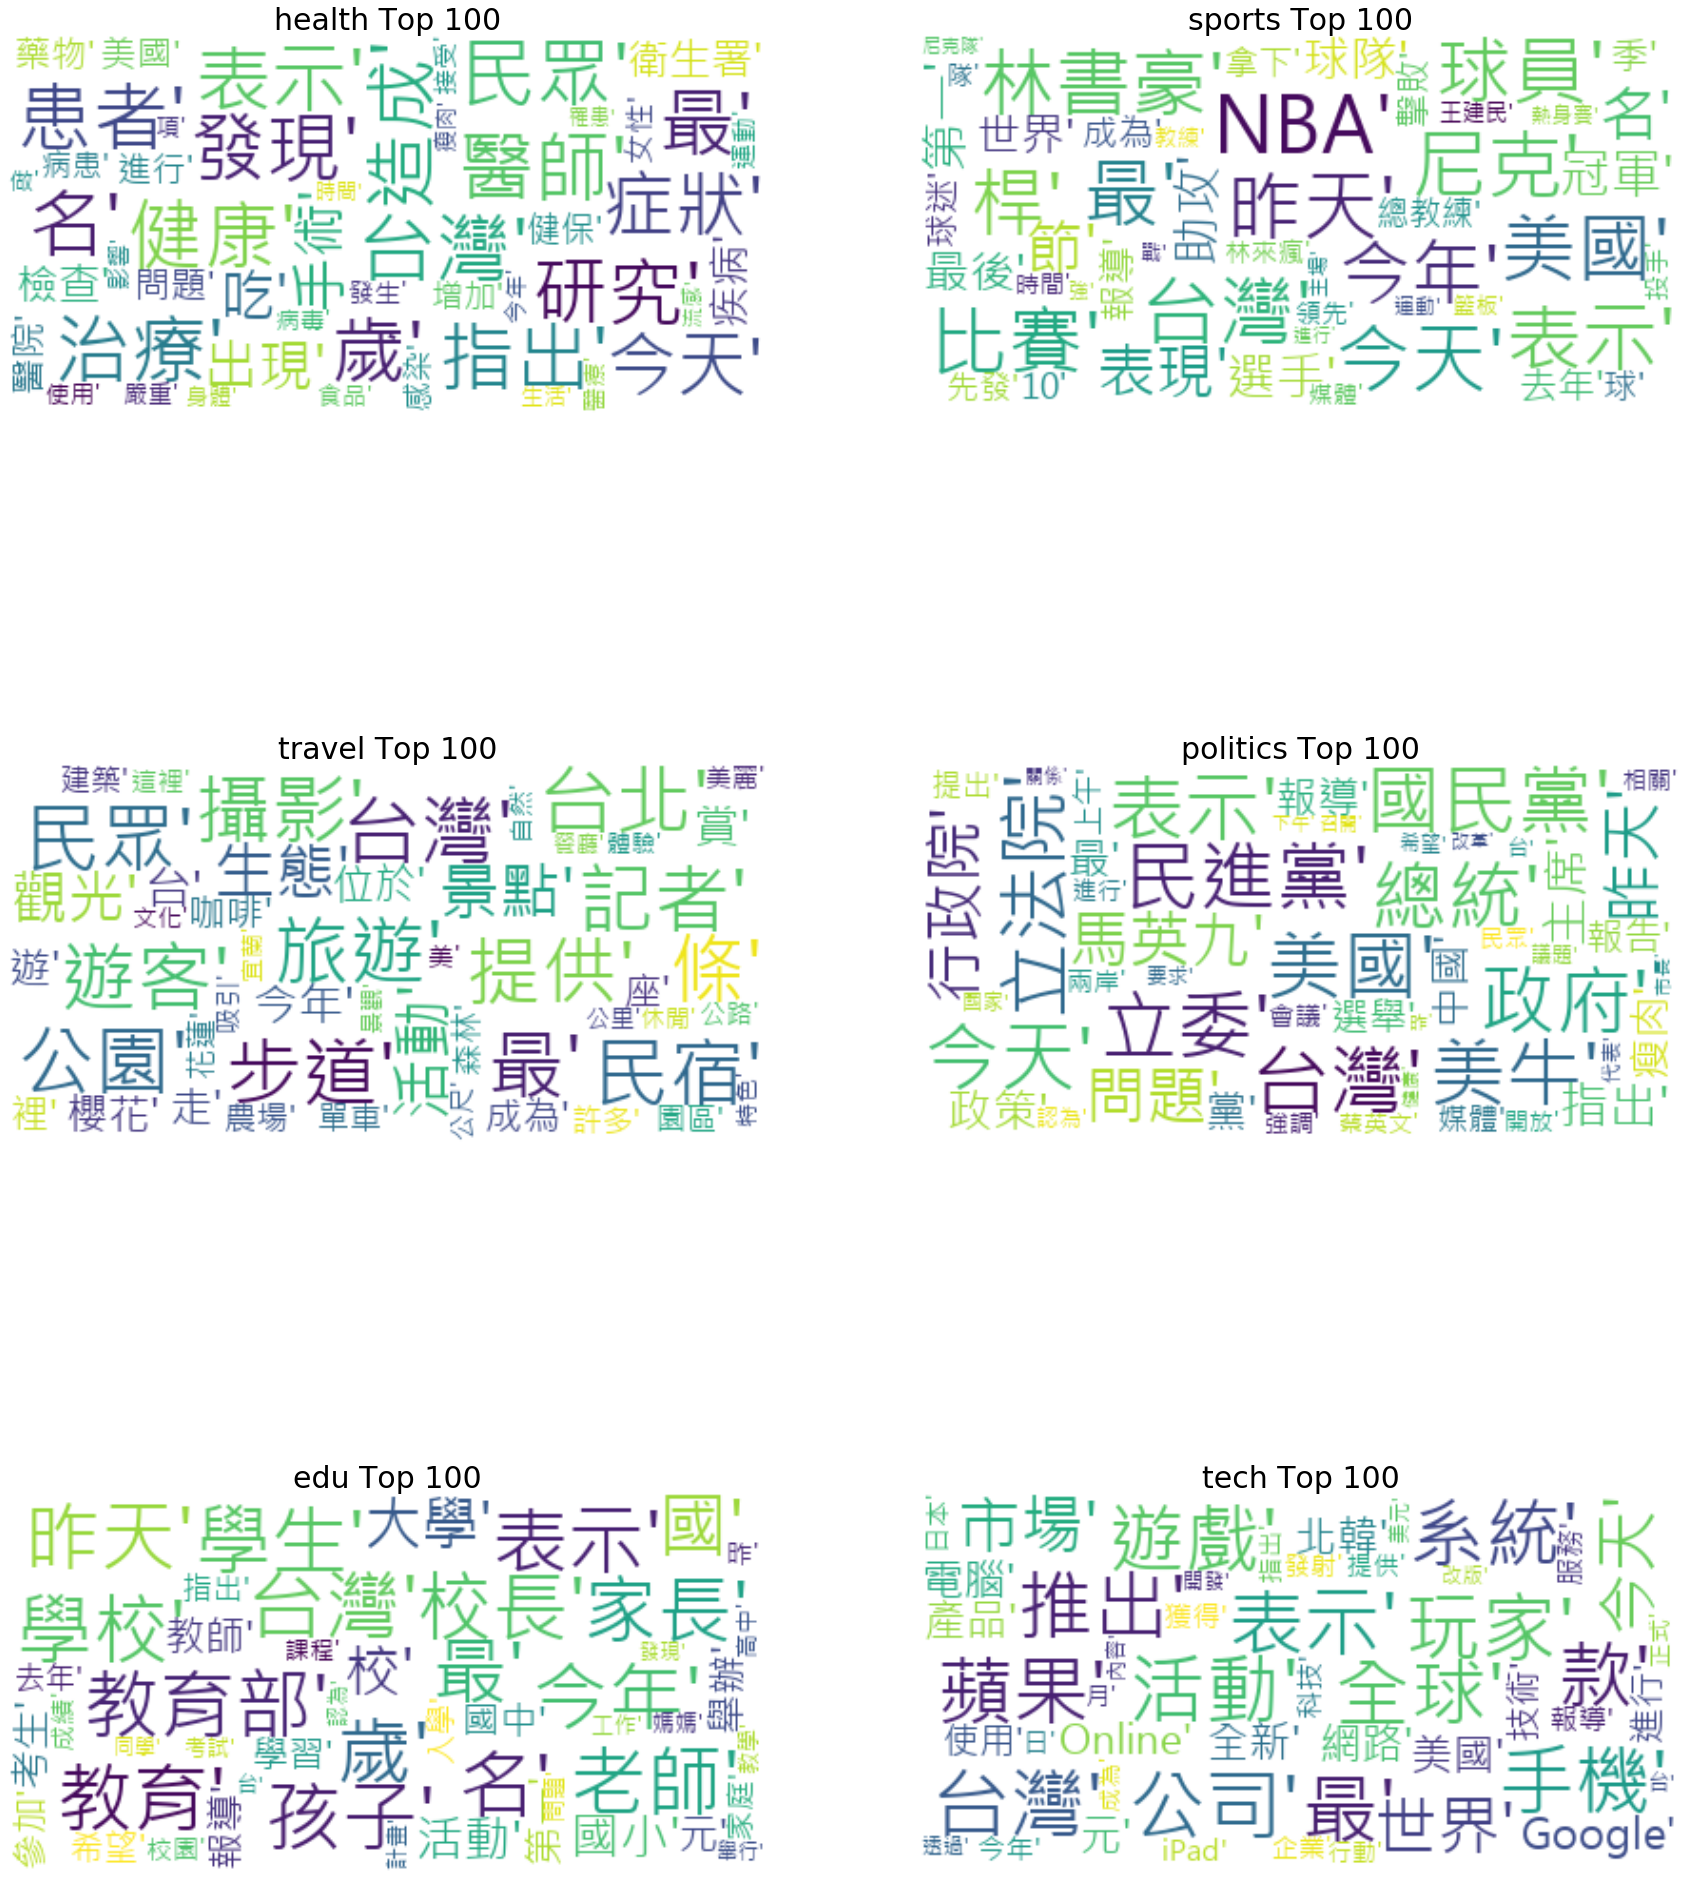

In [164]:
fig,axes = plt.subplots(3, 2, figsize=(30, 38))
k=0
for i in range(3):
    for j in range(2):
        cat = id_to_cat[k]
        most100=Counter(cat_desc[cat]).most_common(100)
        ax = axes[i, j]
        ax.imshow(generate_wordcloud(most100), interpolation="bilinear")
        ax.axis('off')
        ax.set_title("{} Top 100".format(cat), fontsize=30)
        k+=1
        

In [261]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [262]:
# from time import sleep
# from tqdm import tqdm, trange

In [263]:
tfidf = TfidfVectorizer(norm='l2', ngram_range=(1, 2))
features = tfidf.fit_transform(df.seg)
labels = df.cat_id

In [264]:
df.cat_id

0        0
1        0
2        1
3        2
4        0
        ..
29995    4
29996    2
29997    5
29998    4
29999    1
Name: cat_id, Length: 30000, dtype: int64

In [265]:
print(features.shape)
print('-----------------------------')

(30000, 1200778)
-----------------------------


In [266]:
print(features)

  (0, 258656)	0.06958665530776859
  (0, 802227)	0.08260795949560029
  (0, 992228)	0.08260795949560029
  (0, 185873)	0.08260795949560029
  (0, 678922)	0.08260795949560029
  (0, 1049144)	0.08028044145601647
  (0, 224559)	0.08028044145601647
  (0, 1161611)	0.07847507820666881
  (0, 28592)	0.08260795949560029
  (0, 51920)	0.08260795949560029
  (0, 817968)	0.08260795949560029
  (0, 309752)	0.08260795949560029
  (0, 712821)	0.08028044145601647
  (0, 578345)	0.08260795949560029
  (0, 649892)	0.08260795949560029
  (0, 1161657)	0.07575281889492023
  (0, 929457)	0.08260795949560029
  (0, 149654)	0.08260795949560029
  (0, 313138)	0.08260795949560029
  (0, 722142)	0.08260795949560029
  (0, 149569)	0.08260795949560029
  (0, 678921)	0.08260795949560029
  (0, 1161662)	0.16521591899120058
  (0, 182989)	0.16521591899120058
  (0, 451219)	0.16521591899120058
  :	:
  (29999, 1001585)	0.07555560110648293
  (29999, 372116)	0.06605284392795274
  (29999, 1090876)	0.07307494343927948
  (29999, 392115)	0.080607

In [267]:
# type(features)

In [268]:
from sklearn.feature_selection import chi2

In [269]:
# N = 2
# for cat, cat_id in sorted(cat_to_id.items()):
#     features_chi2 = chi2(features, labels == cat_id)
#     indices = np.argsort(features_chi2[0])
#     feature_names = np.array(tfidf.get_feature_names())[indices]
#     unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
#     bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
#     print("# '{}':".format(cat))
#     print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
#     print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

In [270]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [175]:
X_train, X_test, y_train, y_test = train_test_split(df['seg'], df['cat_id'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
 
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
 
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [176]:
X_train_counts.shape

(22500, 106197)

In [177]:
# import jieba as jb

In [178]:
# def myPredict(sec):
#     format_sec=" ".join([w for w in list(jb.cut(remove_punctuation(sec))) if w not in stopwords])
#     pred_cat_id=clf.predict(count_vect.transform([format_sec]))
#     print(id_to_cat[pred_cat_id[0]])

In [179]:
# myPredict("早晨 政治 新圍 報告")

In [234]:
pred_cat_id=clf.predict(count_vect.transform(["自由 車手 韓森 激烈 計時賽 後 贏得 奧運 男子 自由車 場地 賽"]))
print(id_to_cat[pred_cat_id[0]])

sports


In [238]:
testdf = pd.read_csv("test_data0.33.csv")

In [239]:
testdf.head()

,class,seg2
0,?,呂秀蓮 反對 大陸 世界 局勢 很大 變化 大陸 已 快速 崛起 面對 事實 反對 民主 進...
1,?,最小 電晶體 運算 電晶體 體積 約 原子 相當於 40 億分 公尺 嵌入 單一 矽晶內 未來
2,?,巴拉圭 奶機妹 南韓 內衣 名模 奶 機 妹 拉 莉 莎 南韓 參加 愛 紅娘 徵婚 南韓 ...
3,?,總統 持續 關心 泰利 帶來 災情 今天 前往 中央 災害 應變 中心 聆聽 各部 報告 時...
4,?,軍公教 退休金 繳 制度 問題 行政院 經建會 昨日 舉行 年金 制度 改革 規畫 專案小組...


In [185]:
# tm = 20000
# times = 0
# progress = tqdm(total = tm)
result_tmp = []
for i in testdf["seg"]:
    pred_cat_id=clf.predict(count_vect.transform([i]))
    result_tmp.append(id_to_cat[pred_cat_id[0]])
#     progress.update(1)
#     times += 1

In [186]:
ff = result_tmp
#ff

In [187]:
aId = []
for i in range(1,20001):
    aId.append(i)

In [188]:
ffdata = {"Id":aId, "Label":ff}

In [189]:
outdf = pd.DataFrame(data=ffdata)

In [190]:
outdf.head()

,Id,Label
0,1,politics
1,2,tech
2,3,tech
3,4,politics
4,5,politics


In [191]:
outdf.to_csv(r'NB_0.33mp0330.csv', index = False)

In [271]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
 
from sklearn.model_selection import cross_val_score
 
 
models = [
    #RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    #MultinomialNB(),
    #LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [272]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [273]:
#訓練模型
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, 
                                                                                 test_size=0.33, stratify=labels, random_state=0)
# model.fit(X_train, y_train)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [195]:
# tfidf = TfidfVectorizer(norm='l2', ngram_range=(1, 2))
# features = tfidf.fit_transform(df.seg)

In [196]:
# tdf = pd.read_csv("test_0324.csv")

In [274]:
testdf.head(10)

,class,seg2
0,?,呂秀蓮 反對 大陸 世界 局勢 很大 變化 大陸 已 快速 崛起 面對 事實 反對 民主 進...
1,?,最小 電晶體 運算 電晶體 體積 約 原子 相當於 40 億分 公尺 嵌入 單一 矽晶內 未來
2,?,巴拉圭 奶機妹 南韓 內衣 名模 奶 機 妹 拉 莉 莎 南韓 參加 愛 紅娘 徵婚 南韓 ...
3,?,總統 持續 關心 泰利 帶來 災情 今天 前往 中央 災害 應變 中心 聆聽 各部 報告 時...
4,?,軍公教 退休金 繳 制度 問題 行政院 經建會 昨日 舉行 年金 制度 改革 規畫 專案小組...
5,?,拍王 蔡夜會 爆料 議論 有人 臆測 這種 政治 監控 手法 疑似 出自 情治 人員 之手 ...
6,?,智慧 手機 成長 將會 26 成長 大陸 市場 將是 帶動 成長 主要 因素 低階 智慧型 ...
7,?,總統 接見 當代
8,?,維基 解密 阿山 當局 指控 性侵 英國 落網 爆料 網站 維基 解密 創辦人 阿山 吉 十...
9,?,資訊月 90 萬人次 參觀 人次 突破 十五萬 累計 九天 總參 觀 人次 約 九十萬 去年...


In [275]:
test_features = tfidf.transform(testdf.seg2)

In [276]:
test_features.shape

(20000, 1200778)

In [277]:
test_y_pred = model.predict(test_features)

In [278]:
len(test_y_pred)

20000

In [279]:
out_data = {"Id":aId, "Label":test_y_pred}

In [280]:
outdf0325 = pd.DataFrame(data=out_data)

In [281]:
outdf0325

,Id,Label
0,1,3
1,2,5
2,3,5
3,4,3
4,5,3
...,...,...
19995,19996,3
19996,19997,1
19997,19998,5
19998,19999,0


In [282]:
outdf0325.to_csv(r'LinearSVC_0.33x0.33_mp_0330.csv', index = False)

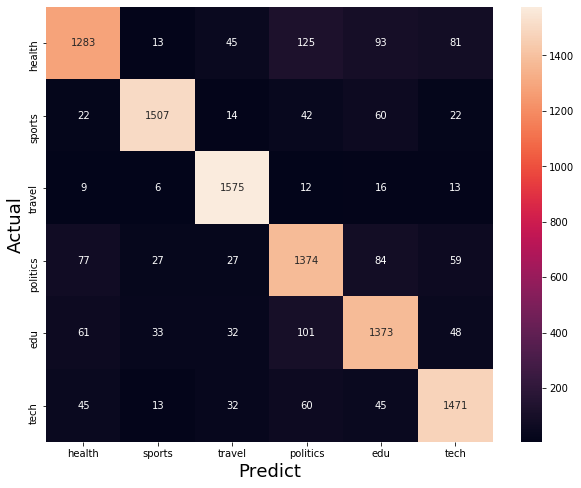

In [283]:
#生成混淆矩阵
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=cat_id_df.cat.values, yticklabels=cat_id_df.cat.values)
plt.ylabel('Actual',fontsize=18)
plt.xlabel('Predict',fontsize=18)
plt.show()

In [284]:
from sklearn.metrics import classification_report
 
print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=cat_id_df['cat'].values))

accuracy 0.866969696969697
              precision    recall  f1-score   support

      health       0.86      0.78      0.82      1640
      sports       0.94      0.90      0.92      1667
      travel       0.91      0.97      0.94      1631
    politics       0.80      0.83      0.82      1648
         edu       0.82      0.83      0.83      1648
        tech       0.87      0.88      0.88      1666

    accuracy                           0.87      9900
   macro avg       0.87      0.87      0.87      9900
weighted avg       0.87      0.87      0.87      9900



In [209]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC    0.867633
Name: accuracy, dtype: float64

In [215]:
mp_df = pd.read_csv("test_0324.csv") # monpa in short as mp

In [216]:
mp_df.head()

,seg,class
0,呂秀蓮 反對 大陸 交往 中央社 記者 陳 靜萍 台 中 日電 前 副 總統 呂秀蓮 今天 ...,?
1,最小 電晶體 運算 數百萬 倍 澳洲 量子 計算 科技 中心 科學家 24 日 宣布 發明 ...,?
2,巴拉圭 奶機妹 南韓 相親 國際 新聞 中心 綜合 報導 2010 南非 世界盃 足球賽 期...,?
3,總統 持續 關心 安置 災民 中央社 記者 劉 建邦 台北 20 日電 總統 馬英九 關切 ...,?
4,軍公教 退休金 繳 領 中國時報 蒼 弘 慈 徐 子 晴 台北 報導 針對 外界 關心 年金...,?


In [217]:
tmp_list = []
for i in mp_df["seg"]:
    tmp = i.split(" ")
    tmp = tmp[0:3]+tmp[17:int(len(tmp)/3)]
    tmp = " ".join(tmp)
    tmp_list.append(tmp)

In [218]:
mp_df["seg2"] = tmp_list

In [219]:
mp_df["seg2"].head()

0    呂秀蓮 反對 大陸 世界 局勢 很大 變化 大陸 已 快速 崛起 面對 事實 反對 民主 進...
1      最小 電晶體 運算 電晶體 體積 約 原子 相當於 40 億分 公尺 嵌入 單一 矽晶內 未來
2    巴拉圭 奶機妹 南韓 內衣 名模 奶 機 妹 拉 莉 莎 南韓 參加 愛 紅娘 徵婚 南韓 ...
3    總統 持續 關心 泰利 帶來 災情 今天 前往 中央 災害 應變 中心 聆聽 各部 報告 時...
4    軍公教 退休金 繳 制度 問題 行政院 經建會 昨日 舉行 年金 制度 改革 規畫 專案小組...
Name: seg2, dtype: object

In [220]:
# del mp_df["V2"]
del mp_df["seg"]
# del mp_df["cat_id"]


In [221]:
mp_df.to_csv(r'test_data0.33.csv', index = False, encoding="utf8")